<a href="https://colab.research.google.com/github/Dhanya-Zac/Codebytes/blob/main/Modified_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
pdt=pd.read_csv('product.csv')
sales=pd.read_csv('sales.csv')
merged_data = pd.merge(sales, pdt, on='product_id')
print(merged_data.isnull().sum())
merged_data.info()

Unnamed: 0_x            0
date                    0
product_id              0
price                   0
units                   0
Unnamed: 0_y            0
brand                   0
flavour                 0
volume_per_joghurt_g    0
packsize                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0_x          260 non-null    int64  
 1   date                  260 non-null    object 
 2   product_id            260 non-null    int64  
 3   price                 260 non-null    float64
 4   units                 260 non-null    float64
 5   Unnamed: 0_y          260 non-null    int64  
 6   brand                 260 non-null    object 
 7   flavour               260 non-null    object 
 8   volume_per_joghurt_g  260 non-null    int64  
 9   packsize              260 non-null    int64  
dtypes: fl

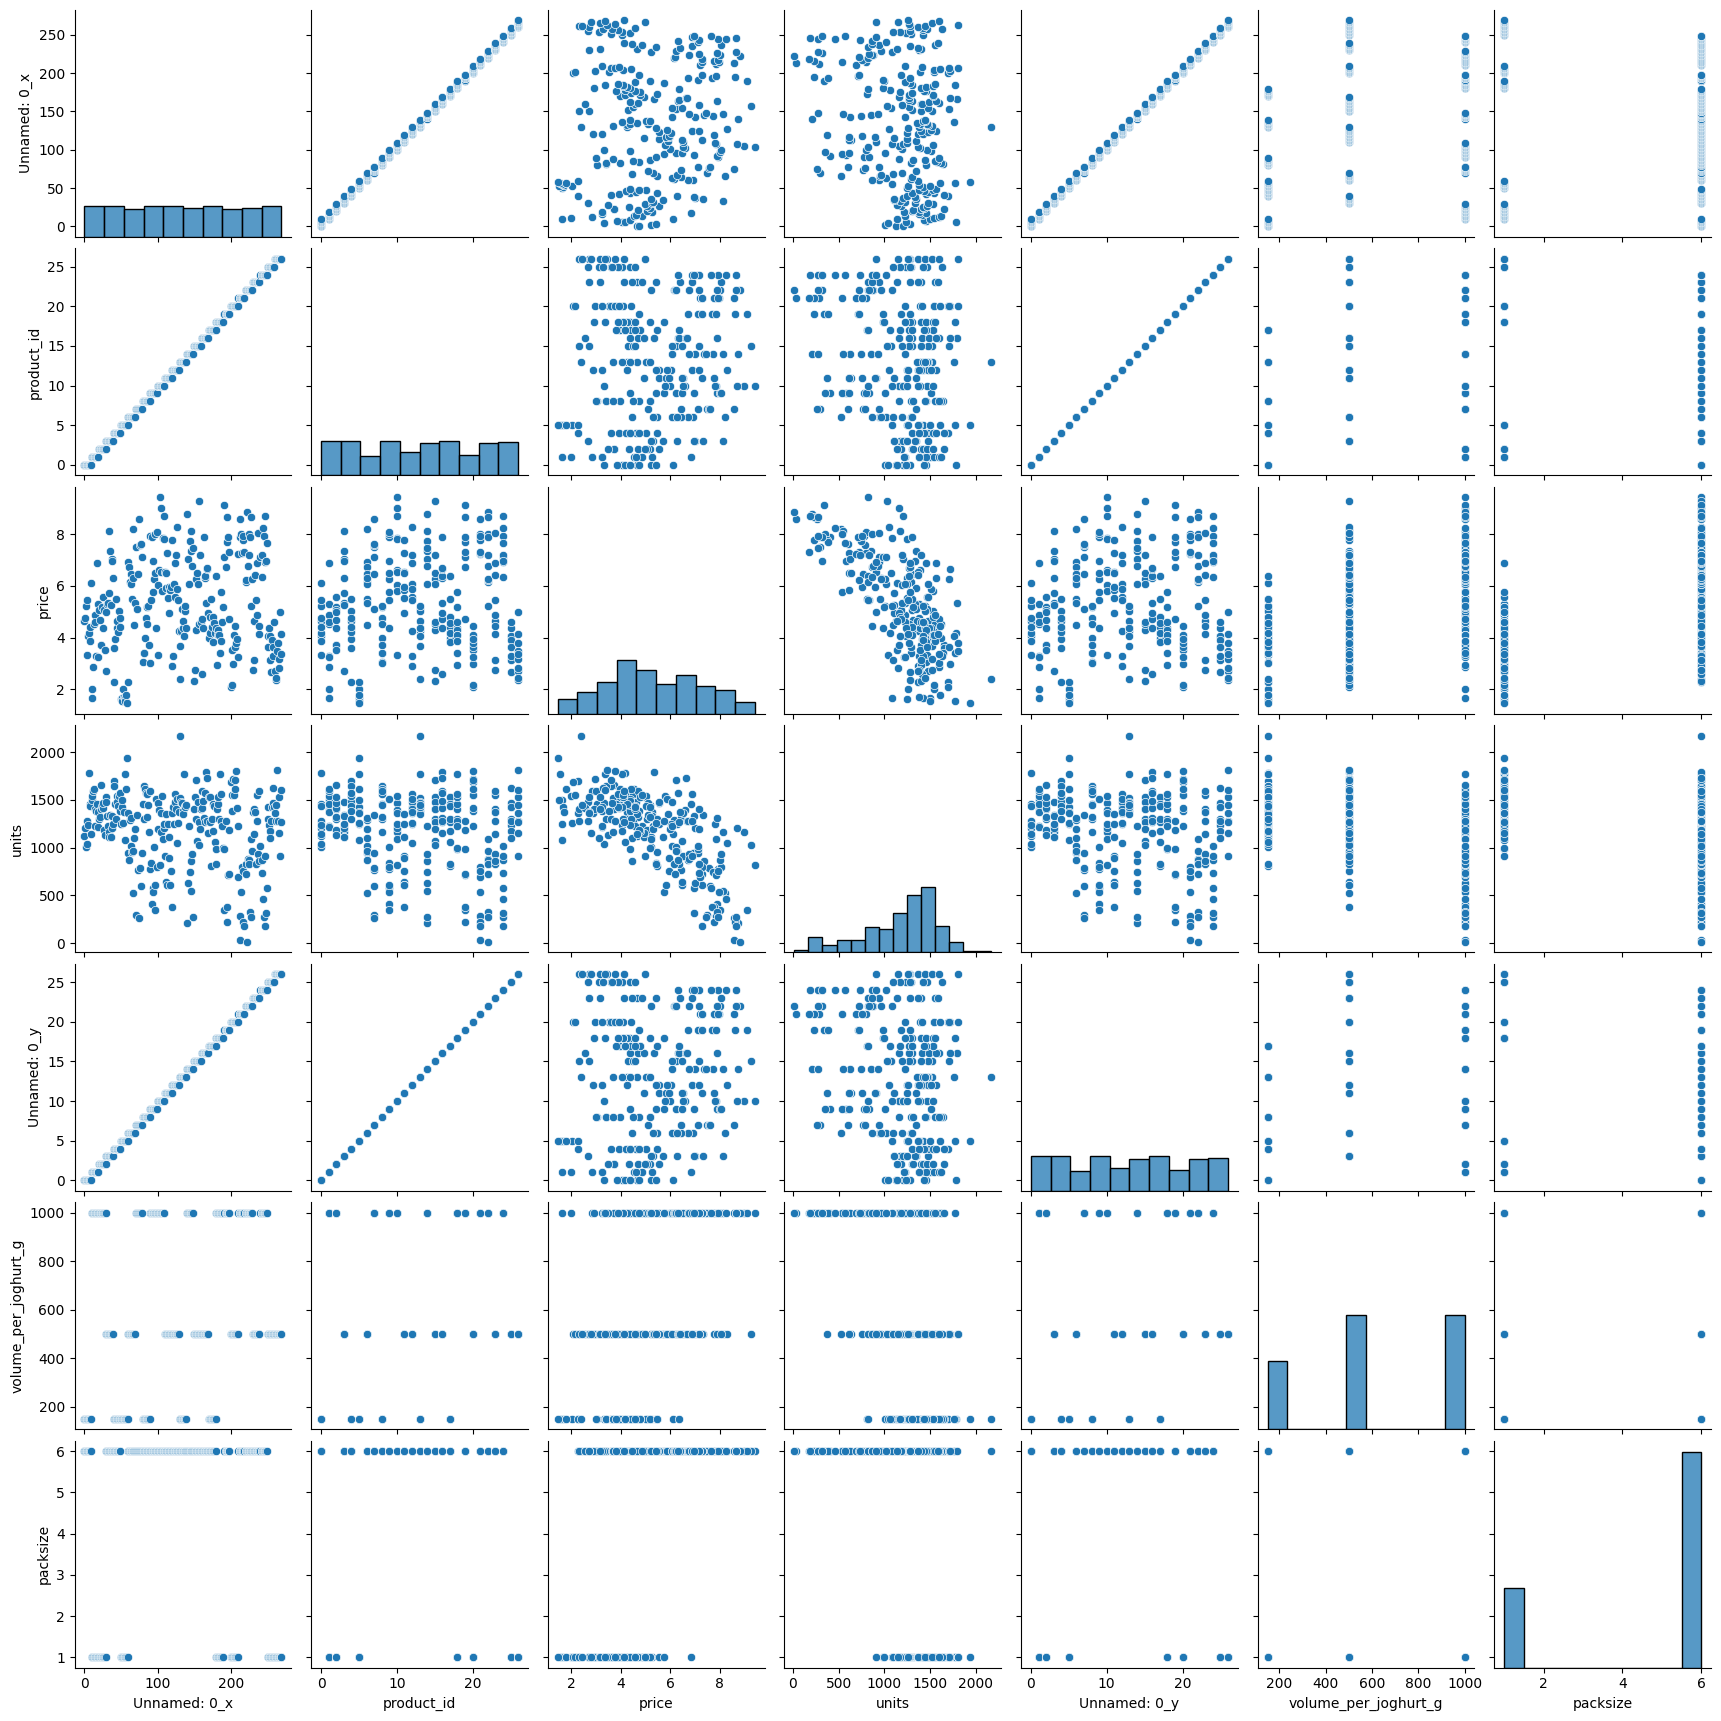

In [29]:
sns.pairplot(merged_data)
plt.show()

In [30]:
merged_data.columns
merged_data.dtypes

,0
Unnamed: 0_x,int64
date,object
product_id,int64
price,float64
units,float64
Unnamed: 0_y,int64
brand,object
flavour,object
volume_per_joghurt_g,int64
packsize,int64


Heatmap to show correlation

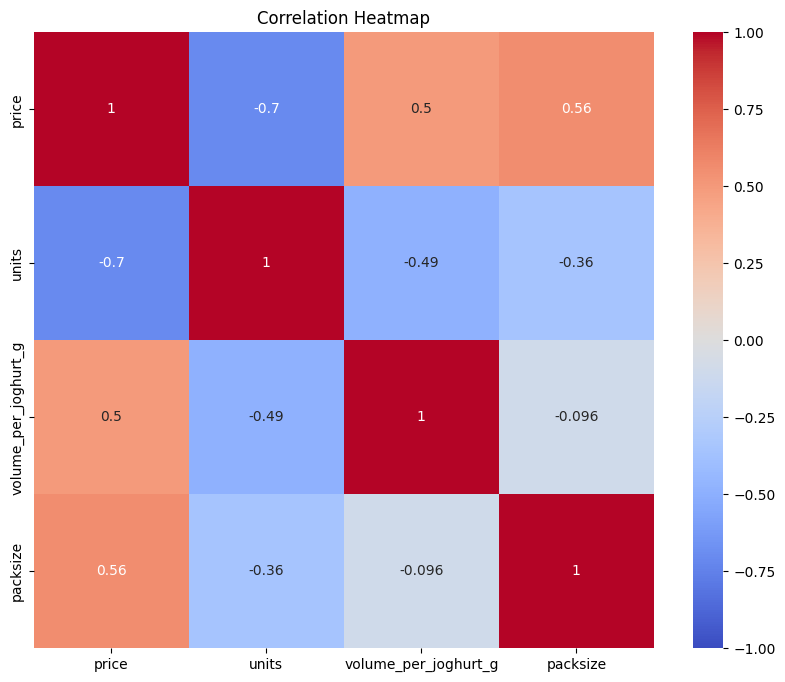

In [31]:
data = pd.DataFrame(merged_data)

# Convert categorical variables to numerical using one-hot encoding
encoded = pd.get_dummies(data[['brand', 'flavour']])

# You can aggregate or pivot data as needed; here’s a simple example of creating a correlation matrix
correlation_matrix = data[['price', 'units', 'volume_per_joghurt_g', 'packsize']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

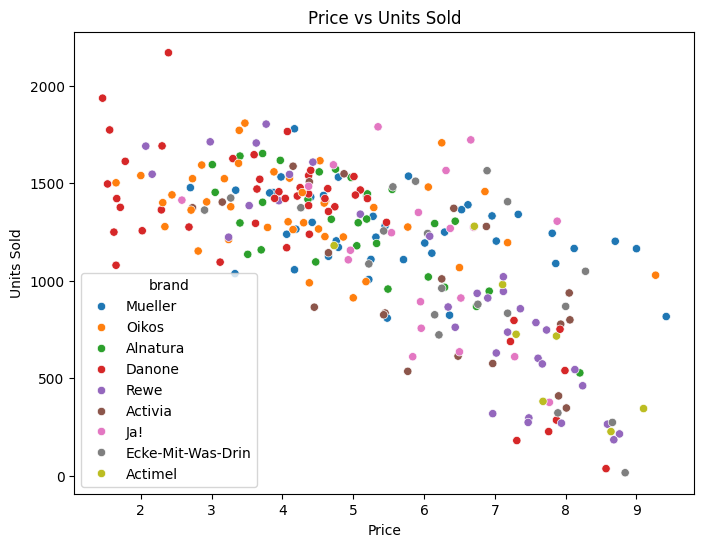

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='units', data=merged_data, hue='brand')
plt.title("Price vs Units Sold")
plt.xlabel("Price")
plt.ylabel("Units Sold")
plt.show()

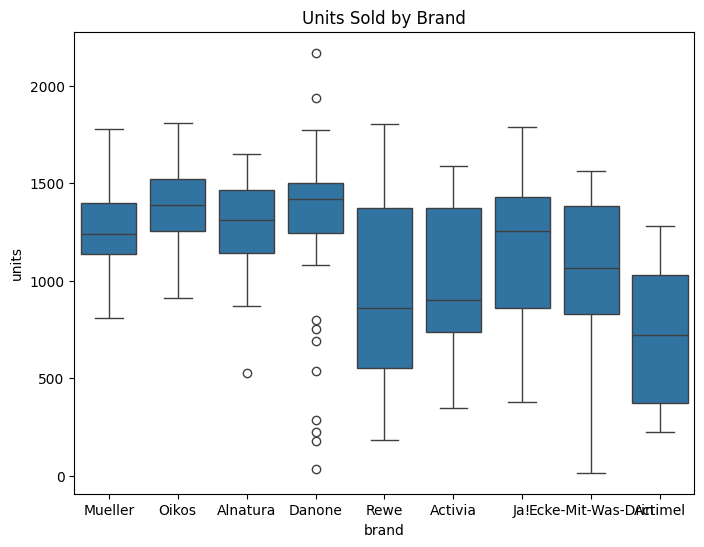

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='brand', y='units', data=merged_data)
plt.title("Units Sold by Brand")
plt.show()

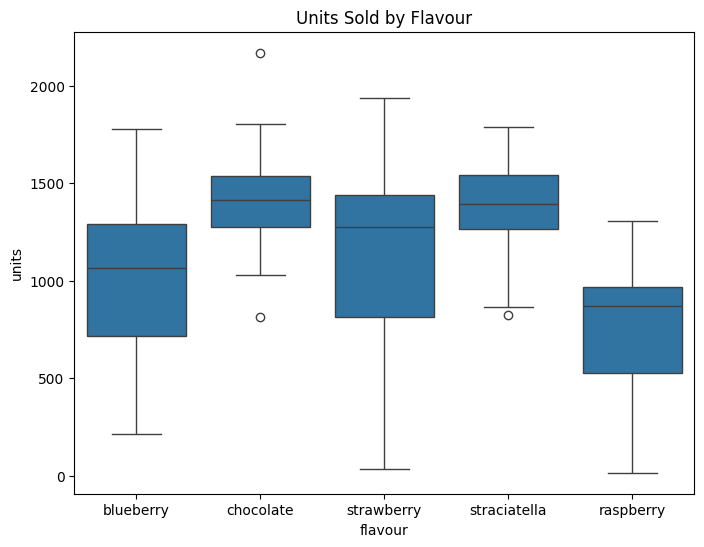

In [34]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='flavour', y='units', data=merged_data)
plt.title("Units Sold by Flavour")
plt.show()

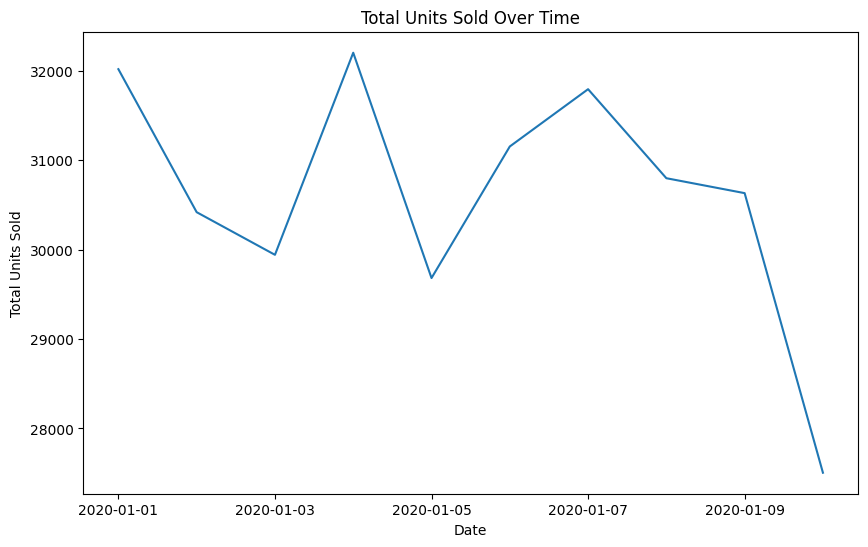

In [35]:
plt.figure(figsize=(10, 6))
merged_data.groupby('date')['units'].sum().plot()
plt.title("Total Units Sold Over Time")
plt.xlabel("Date")
plt.ylabel("Total Units Sold")
plt.show()

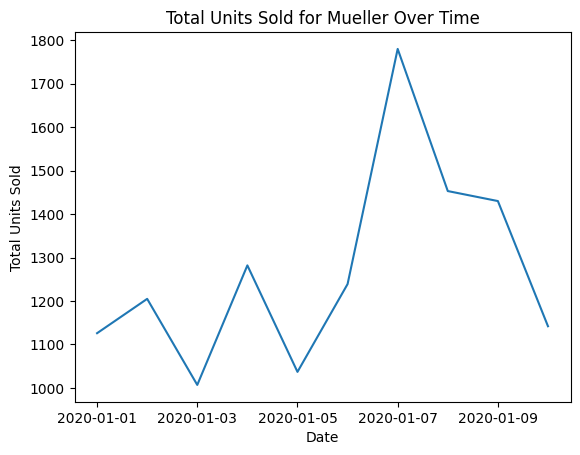

In [36]:
product_data = merged_data[merged_data['product_id'] == 0]
product_data.groupby('date')['units'].sum().plot()
plt.title(f"Total Units Sold for Mueller Over Time")
plt.xlabel("Date")
plt.ylabel("Total Units Sold")
plt.show()

Revenue

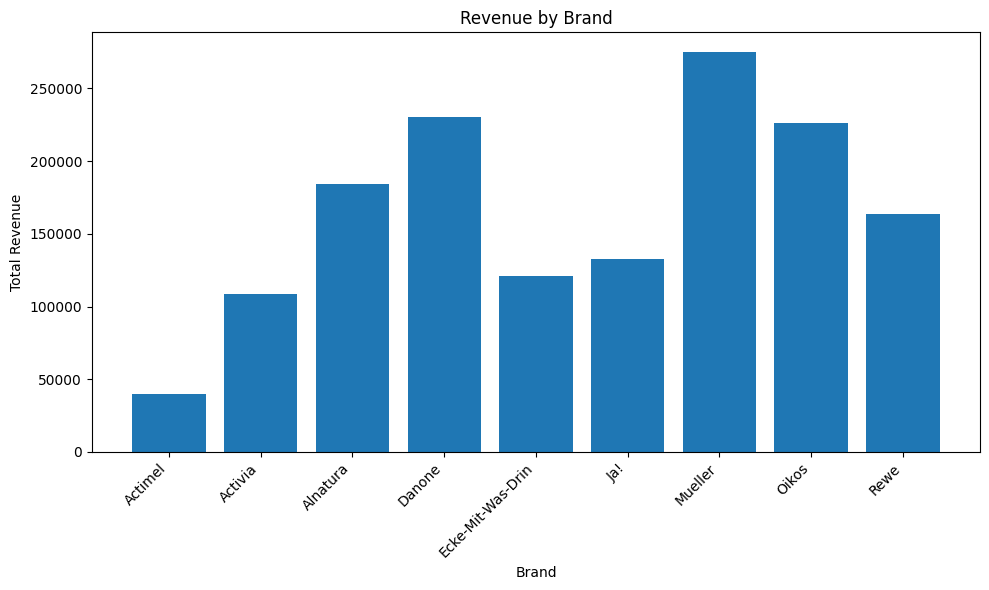

In [37]:
merged_data['revenue'] = merged_data['price'] * merged_data['units']
brand_revenue = merged_data.groupby('brand')['revenue'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(brand_revenue['brand'], brand_revenue['revenue'])
plt.xlabel('Brand')
plt.ylabel('Total Revenue')
plt.title('Revenue by Brand')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Linear Regression Model
First check assumptions of linear regression : Normality and homodescasity

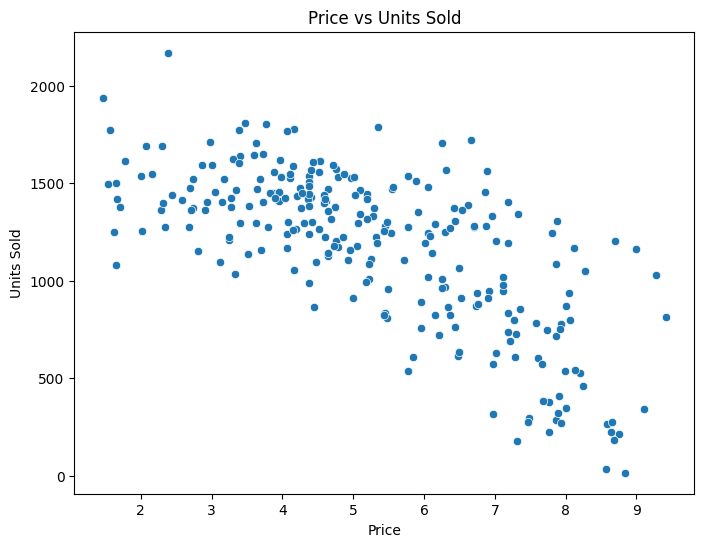

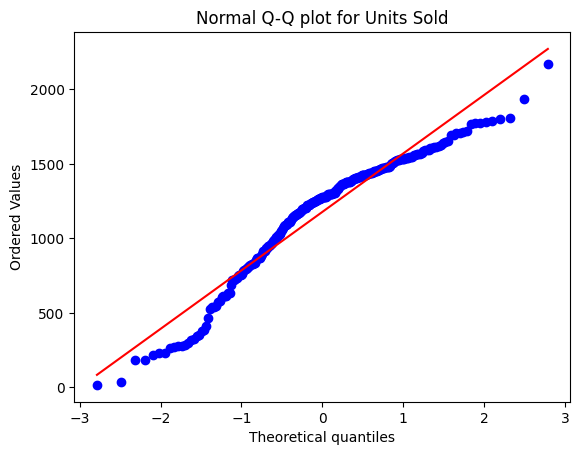

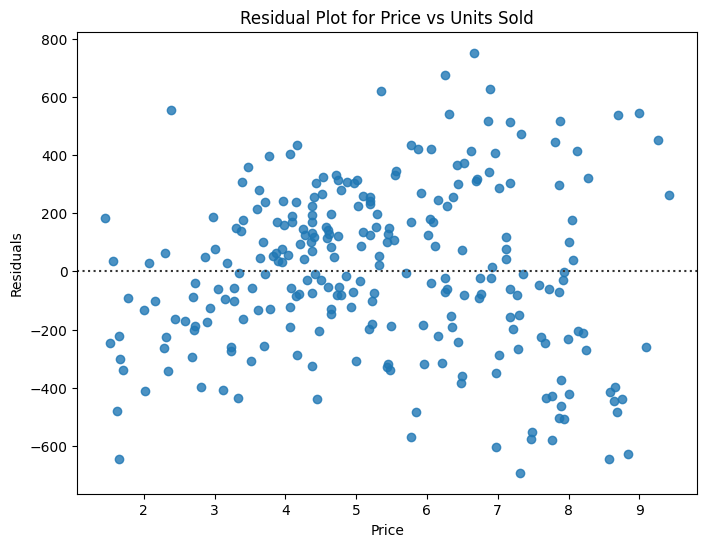

In [38]:
import scipy.stats as stats
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='units', data=merged_data)
plt.title("Price vs Units Sold")
plt.xlabel("Price")
plt.ylabel("Units Sold")
plt.show()

# Check for normality of units sold
stats.probplot(merged_data['units'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot for Units Sold")
plt.show()

# Check for homoscedasticity
plt.figure(figsize=(8, 6))
sns.residplot(x='price', y='units', data=merged_data)
plt.title("Residual Plot for Price vs Units Sold")
plt.xlabel("Price")
plt.ylabel("Residuals")
plt.show()

This suggests non normality and non uniform variance due to high negative correlation between price and units. So a log log transformation model would be apt where the coefficients can directly expressed as elasticity

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats

merged_data['log_units'] = np.log(merged_data['units'] + 1e-5)
merged_data['log_price'] = np.log(merged_data['price'] + 1e-5)

features_log = pd.concat([merged_data[['log_price', 'volume_per_joghurt_g', 'packsize']], encoded], axis=1)
target_log = merged_data['log_units']

In [40]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(features_log, target_log, test_size=0.3, random_state=42)

# Train the linear regression model on log-transformed data
model_log = LinearRegression()
model_log.fit(X_train_log, y_train_log)
y_pred_log = model_log.predict(X_test_log)
mse_log = mean_squared_error(y_test_log, y_pred_log)
r2_log = r2_score(y_test_log, y_pred_log)

print(f"Log-Log Model - Mean Squared Error (MSE): {mse_log:.4f}")
print(f"Log-Log Model - R-squared (R²): {r2_log:.4f}")


Log-Log Model - Mean Squared Error (MSE): 0.3574
Log-Log Model - R-squared (R²): 0.3709


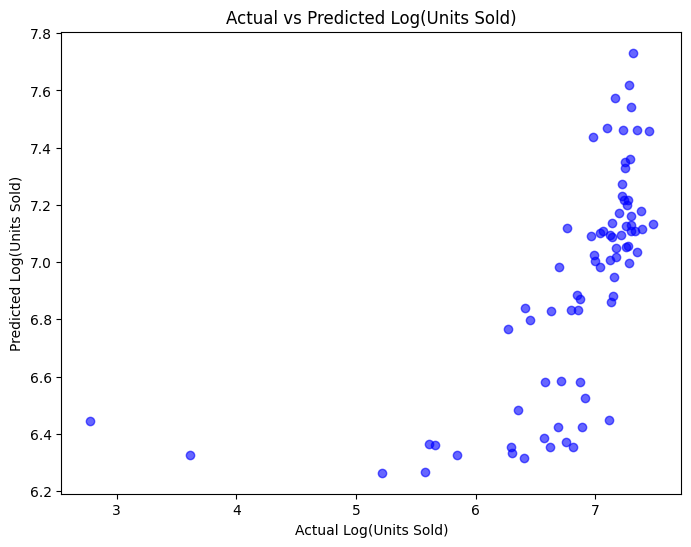

                         Log Coefficient
log_price                      -0.392477
volume_per_joghurt_g           -0.000261
packsize                       -0.048475
brand_Actimel                  -0.122687
brand_Activia                  -0.072702
brand_Alnatura                  0.187868
brand_Danone                   -0.104058
brand_Ecke-Mit-Was-Drin         0.025093
brand_Ja!                       0.083543
brand_Mueller                   0.155474
brand_Oikos                     0.009050
brand_Rewe                     -0.161580
flavour_blueberry              -0.120542
flavour_chocolate               0.239787
flavour_raspberry              -0.163694
flavour_straciatella            0.208422
flavour_strawberry             -0.163973


In [41]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_log, y_pred_log, alpha=0.6, color='b')
plt.title("Actual vs Predicted Log(Units Sold)")
plt.xlabel("Actual Log(Units Sold)")
plt.ylabel("Predicted Log(Units Sold)")
plt.show()

coefficients_log = pd.DataFrame(model_log.coef_, index=features_log.columns, columns=['Log Coefficient'])
print(coefficients_log)


In [42]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the mean of the log-transformed units sold in the training set
mean_log_units = np.mean(y_train_log)
y_baseline = np.full_like(y_test_log, mean_log_units)

baseline_mse = mean_squared_error(y_test_log, y_baseline)
baseline_r2 = r2_score(y_test_log, y_baseline)
model_mse = mean_squared_error(y_test_log, y_pred_log)
model_r2 = r2_score(y_test_log, y_pred_log)

print(f"Baseline Model -MSE: {baseline_mse:.4f}")
print(f"Baseline Model - R-squared: {baseline_r2:.4f}")
print(f"Model - MSE: {model_mse:.4f}")
print(f"Model - R-squared: {model_r2:.4f}")

mse_risk = model_mse - baseline_mse
r2_improvement = model_r2 - baseline_r2

print(f"Increase in MSE compared to Baseline: {mse_risk:.4f}")
print(f"Improvement in R² compared to Baseline: {r2_improvement:.4f}")


Baseline Model - Mean Squared Error (MSE): 0.6060
Baseline Model - R-squared (R²): -0.0667
Developed Model - Mean Squared Error (MSE): 0.3574
Developed Model - R-squared (R²): 0.3709
Increase in MSE compared to Baseline: -0.2486
Improvement in R² compared to Baseline: 0.4376
